In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
# Reading the CSV File
bank_df = pd.read_csv('bank_additional_full.csv',sep=';')

In [3]:
# Visualizing the dataset
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Standardizing the Column Names
bank_df.columns = bank_df.columns.str.strip().str.replace('.','_')

In [5]:
# Getting dataset info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## Segregating the object columns from the dataset

In [6]:
# Segregating object columns from the dataset and converting them to categorical
cat_df = bank_df.select_dtypes(include='object')

In [7]:
cat_df = cat_df.astype('category')

In [8]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  category
 1   marital      41188 non-null  category
 2   education    41188 non-null  category
 3   default      41188 non-null  category
 4   housing      41188 non-null  category
 5   loan         41188 non-null  category
 6   contact      41188 non-null  category
 7   month        41188 non-null  category
 8   day_of_week  41188 non-null  category
 9   poutcome     41188 non-null  category
 10  y            41188 non-null  category
dtypes: category(11)
memory usage: 444.7 KB


## Doing the EDA of the categorical columns

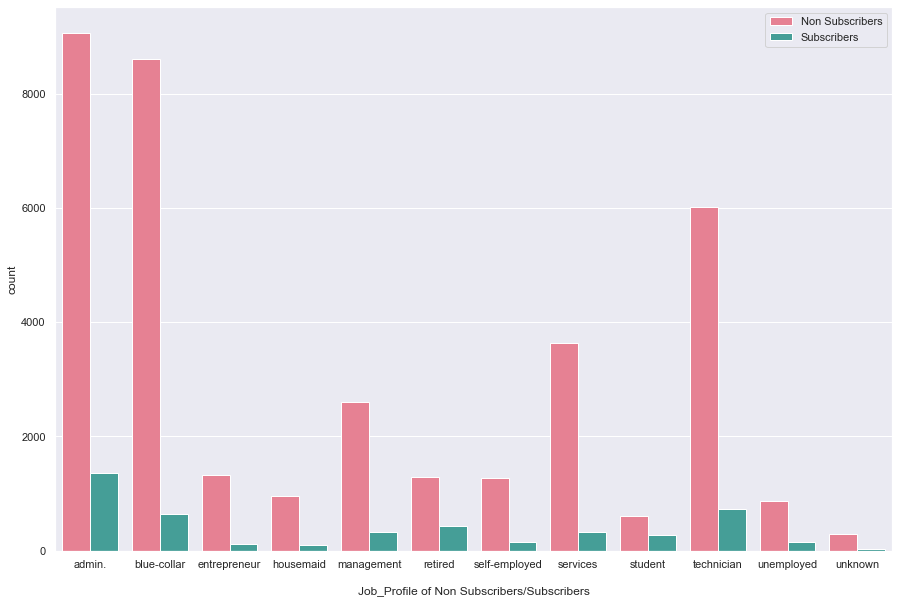

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x='job',hue = 'y',data=cat_df,palette="husl")
plt.xlabel('\nJob_Profile of Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])# 1st & 2nd Entry in legend correspond to y=0 & y=1 respectively
plt.show()

### From above we can see that distributions of Job_Profile for both Non Subscribers/Subscribers are more or less similar. But  among various job profiles, comparatively high % of retired & students who were contacted , subscribed  to the term deposit.

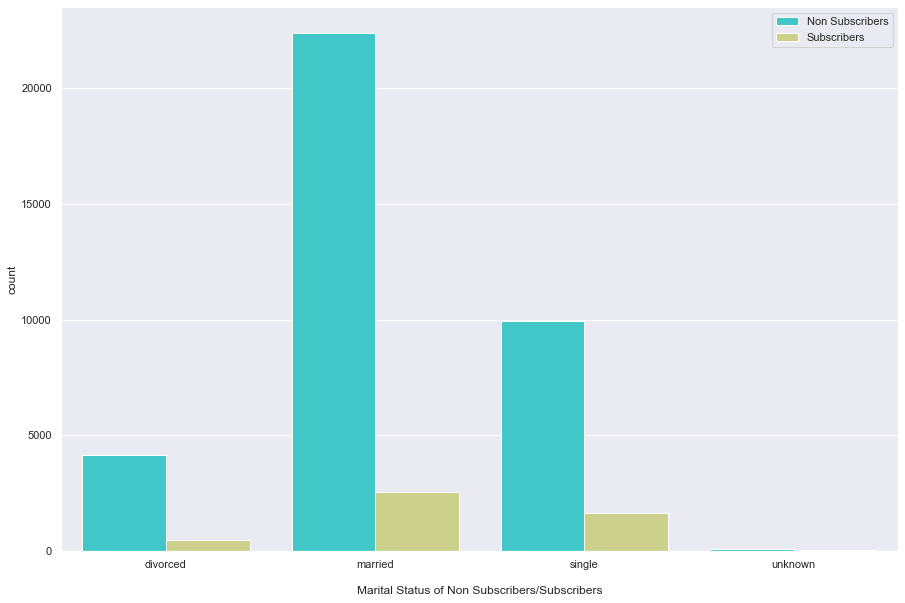

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(x='marital',hue = 'y',data=cat_df,palette="rainbow")
plt.xlabel('\nMarital Status of Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])# 1st & 2nd Entry in legend correspond to y=0 & y=1 respectively
plt.show()

### From above we can visualize that married followed by the singles were the largest categories of customers who subscribed to the term deposit campaign.

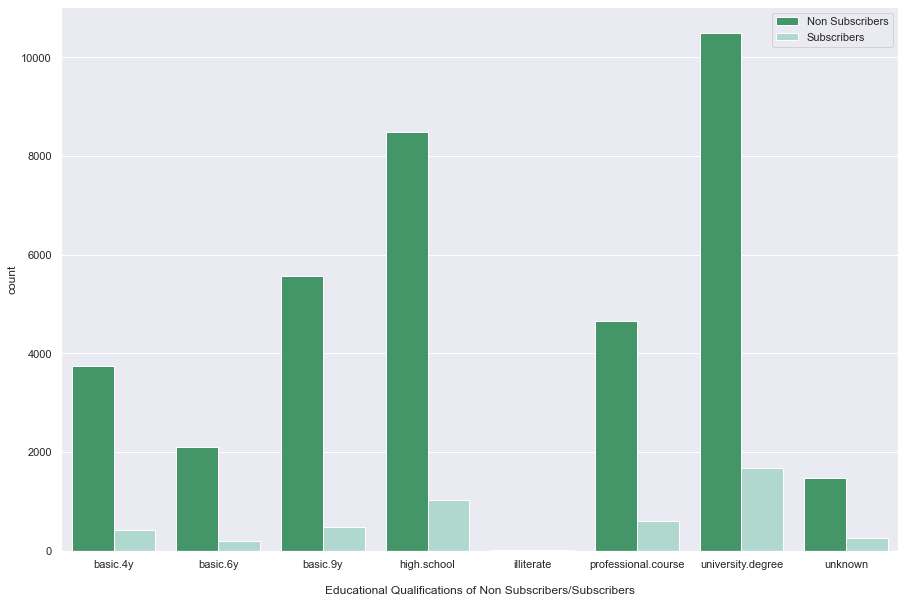

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(x='education',hue = 'y',data=cat_df,palette="BuGn_r")
plt.xlabel('\nEducational Qualifications of Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])# 1st & 2nd Entry in legend correspond to y=0 & y=1 respectively
plt.show()

### From above we can visualize that almost all the campaign subscribers were literate. Further the university graduates formed the largest pool among the subscribers.

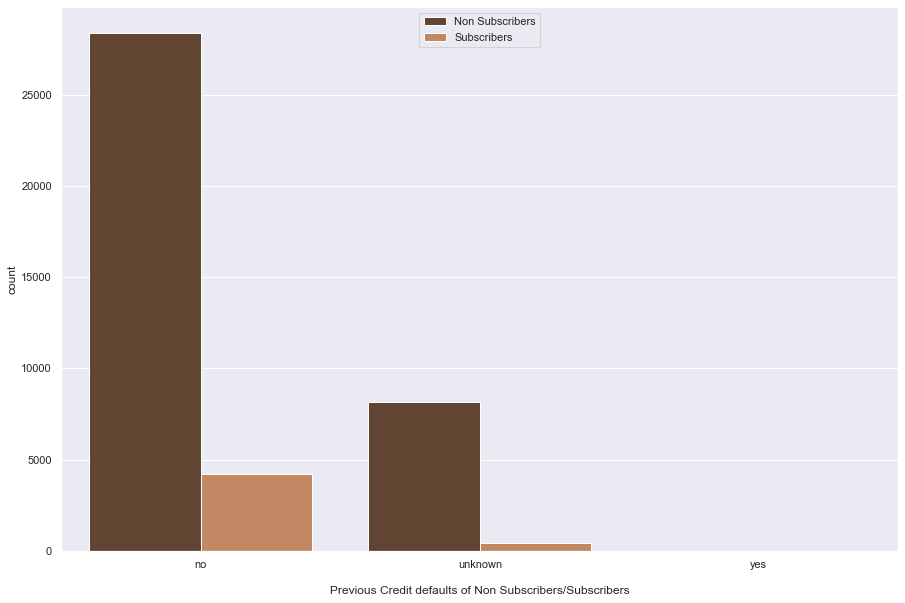

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(x='default',hue = 'y',data=cat_df,palette="copper")
plt.xlabel('\nPrevious Credit defaults of Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])
plt.show()

### From above we can clearly make out that most of the subscribers have no past credit default history.

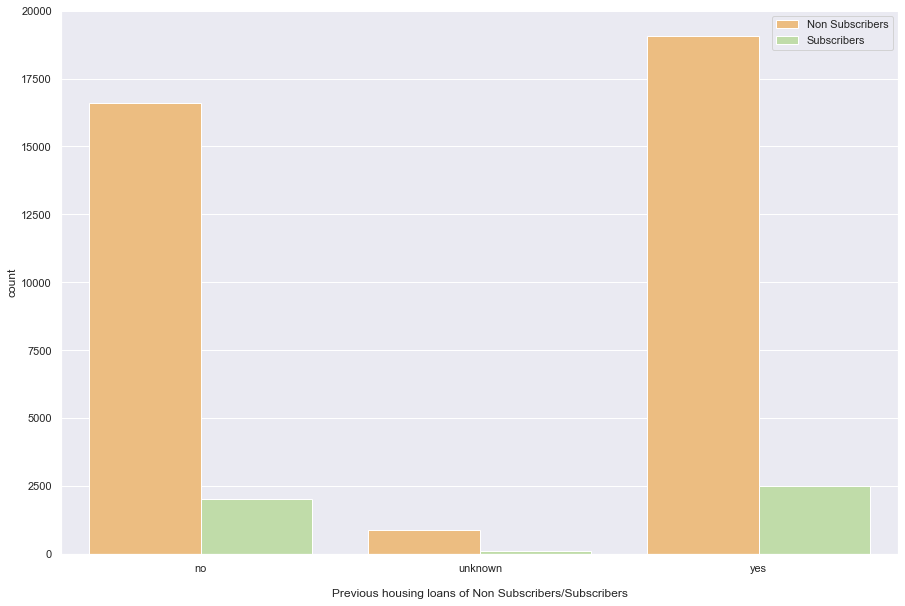

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(x='housing',hue = 'y',data=cat_df,palette='Spectral')
plt.xlabel('\nPrevious housing loans of Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])
plt.show()

### From the above graph, we can clearly make out that more than 50% of subscribers had a previous housing loan.

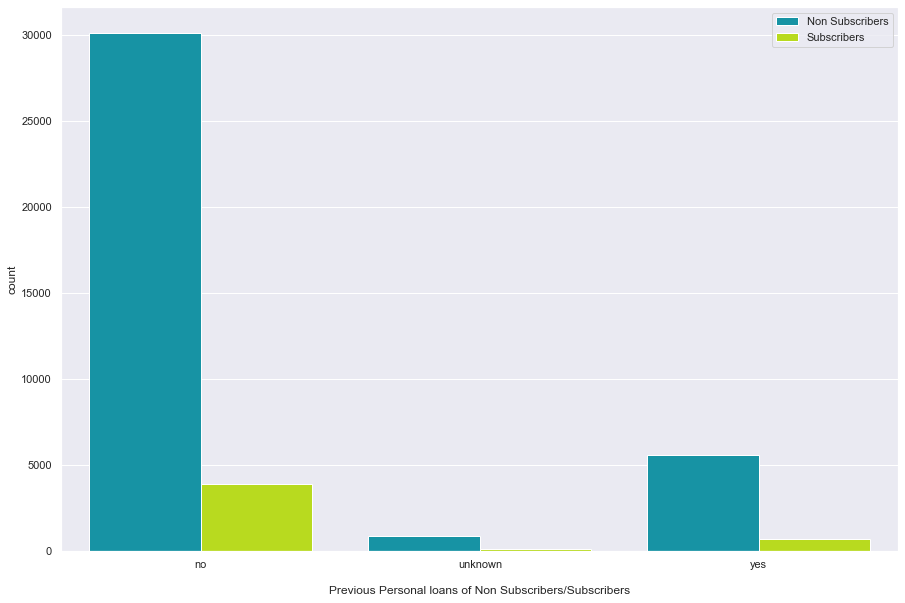

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(x='loan',hue = 'y',data=cat_df,palette='nipy_spectral')
plt.xlabel('\nPrevious Personal loans of Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])
plt.show()

### The above graph clearly depicts that most of the subscribers had not taken a personal loan in the past.

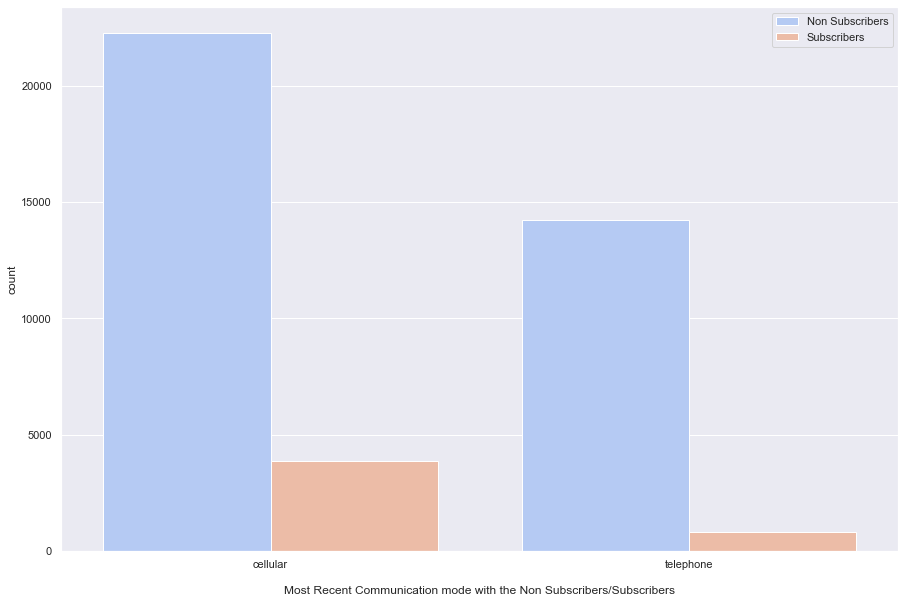

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(x='contact',hue = 'y',data=cat_df,palette='coolwarm')
plt.xlabel('\nMost Recent Communication mode with the Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])
plt.show()

### From the above plot, we can make out that most of the subscribers were contacted on their cellphone.

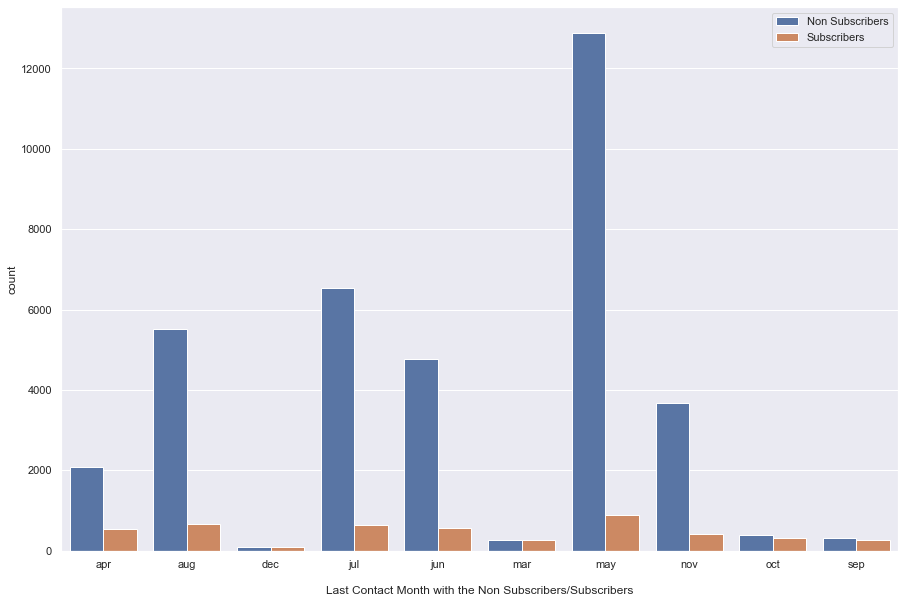

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(x='month',hue = 'y',data=cat_df)
plt.xlabel('\nLast Contact Month with the Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])
plt.show()

### The previous chart shows that most of the subscribers were last contacted during summer months. So may be summer is the best time to bring out a new campaign.

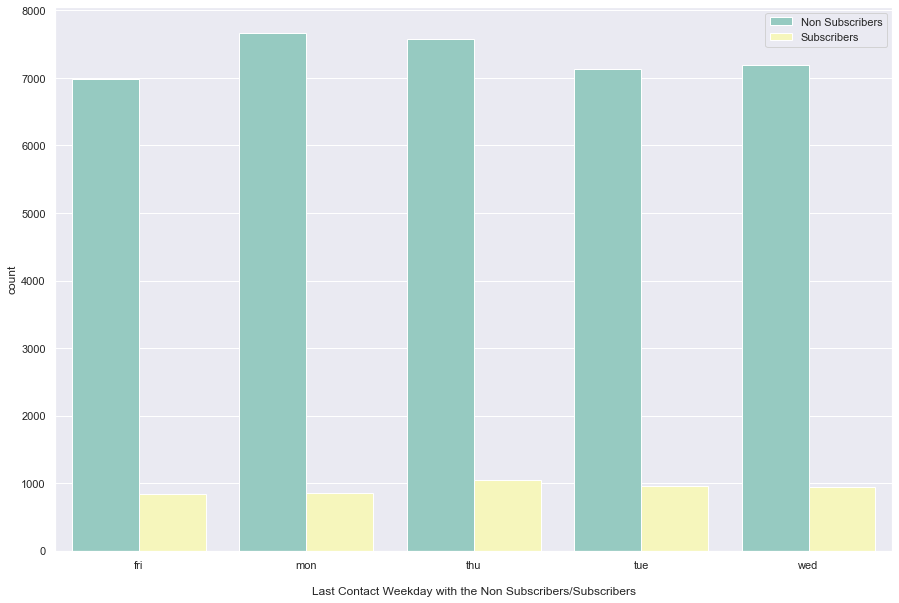

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(x='day_of_week',hue = 'y',data=cat_df,palette='Set3')
plt.xlabel('\nLast Contact Weekday with the Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])
plt.show()

### From the above plot, we can make out that clients were contacted fairly uniformly during the week

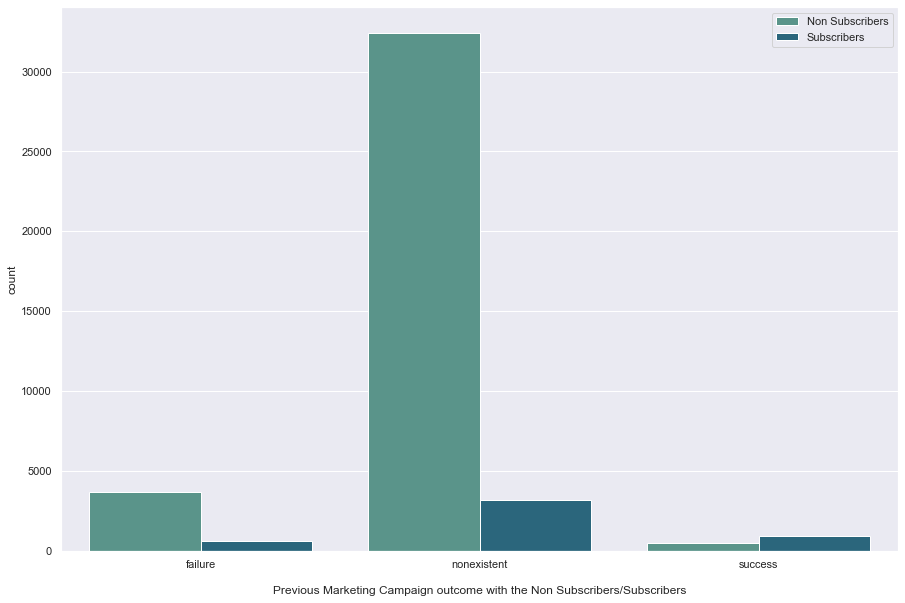

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(x='poutcome',hue = 'y',data=cat_df,palette='crest')
plt.xlabel('\nPrevious Marketing Campaign outcome with the Non Subscribers/Subscribers')
plt.legend(['Non Subscribers','Subscribers'])
plt.show()

### An imp observation (observed before as well) from the above graph shows that a very high % of subscribers were repeat customers. This point should be considered when selecting/contacting clients for any new future campaigns.